# *K*-Means Clustering

$K$-means clustering is a simple and elegant approach for partitioning a data set into $K$ distinct, non-overlapping clusters. To perform $K$-means clustering, we must first specify the desired number of clusters $K$; then the $K$-means algorithm will assign each observation to exactly one of the $K$ clusters.

In [25]:
## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

data(openness)

##  Obs:   114

## 1. open                     imports as % GDP, '73-
## 2. inf                      avg. annual inflation, '73-
## 3. pcinc                    1980 per capita inc., U.S. 
## 4. land                     land area, square miles
## 5. oil                      =1 if major oil producer
## 6. good                     =1 if 'good' data
## 7. lpcinc                   log(pcinc)
## 8. lland                    log(land)
## 9. lopen                    log(open)
## 10. linf                    log(inf)
## 11. opendec                 open/100
## 12. linfdec                 log(inf/100)

openness.copy <- openness
openness.copy$oil <- as.factor(openness.copy$oil)

## for easy data manipulation and visualization
if (!require(caret)) install.packages('caret')
library(caret)

## creating dummy variable for oil==1 and dropping dummy y81==0
dmy <- dummyVars(" ~ oil", data = openness.copy, fullRank=T)
datos <- subset(openness.copy, select=c("open","inf","pcinc","land"))
datos <- cbind(datos,data.frame(predict(dmy, newdata = openness.copy)))
head(datos)

## pre-processing the data
mydatos <- scale(subset(datos,select=c("open","inf")))

open,inf,pcinc,land,oil.1
<dbl>,<dbl>,<int>,<dbl>,<dbl>
31.4,9.9,1998,919595,0
9.4,117.0,4342,1072067,0
16.7,9.5,8349,2966150,0
35.6,5.0,8230,32375,0
91.0,4.8,9185,240,1
17.0,12.9,540,55598,0


The $K$-means clustering procedure results from a simple and intuitive mathematical problem.We begin by defining some notation. Let $C_1,\ldots , C_K$ denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:

1. $C_{1} \cup C_{2} \cup \ldots \cup C_{K}=\{1, \ldots, n\}$. In other words, each observation belongs to at least one of the $K$ clusters.

2. $C_{k} \cap C_{k^{\prime}}=\{\emptyset\}$ for all $k \neq k^{\prime}$. In other words, the clusters are non-overlapping: no observation belongs to more than one cluster.

For instance, if the $i$th observation is in the $k$ th cluster, then $i \in C_{k}$. The idea behind $K$ -means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. The within-cluster variation for cluster $C_{k}$ is a measure $W\left(C_{k}\right)$ of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem

$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} W\left(C_{k}\right)\right\}.
$$

In words, this formula says that we want to partition the observations into $K$ clusters such that the total within-cluster variation, summed over all $K$ clusters, is as small as possible. Solving this last equation seems like a reasonable idea, but in order to make it actionable we need to define the within-cluster variation. There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance. That is, we define

$$
W\left(C_{k}\right)=\frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2},
$$

where $p=\text{dim}(x_{i j})$, and $\left|C_{k}\right|$ denotes the number of observations in the $k$ th cluster. In other words, the within-cluster variation for the $k$th cluster is the sum of all of
the pairwise squared [Euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance) between the observations in the $k$th cluster, divided by the total number of observations in the $k$th cluster. Therefore

$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}\right\}
$$

***
**Algorithm**: <ins>_K_ Means Clustering</ins>

1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:
 1. For each of the $K$ clusters, compute the cluster centroid. The $k$th cluster centroid is the vector of the $p$ feature means for the observations in the $k$th cluster.
 2. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

In [ ]:
## K-means: Compute and visualize K-means clustering
set.seed(42)
clusters <- kmeans(mydatos,3,nstart = 50)
str(clusters)

## Save the cluster number in the dataset as column 'type'
datos$type <- as.factor(clusters$cluster)
head(datos)

In [ ]:
## installing the 'factoextra' package if not previously installed
if (!require(factoextra)) install.packages('factoextra')

## visualizing the results
fviz_cluster(clusters,data=mydatos,palette="jco",ggtheme=theme_minimal())

In [ ]:
## Determining a data-driven optimal number of clusters
fviz_nbclust(mydatos,kmeans,method="silhouette")

[1] 3.466795

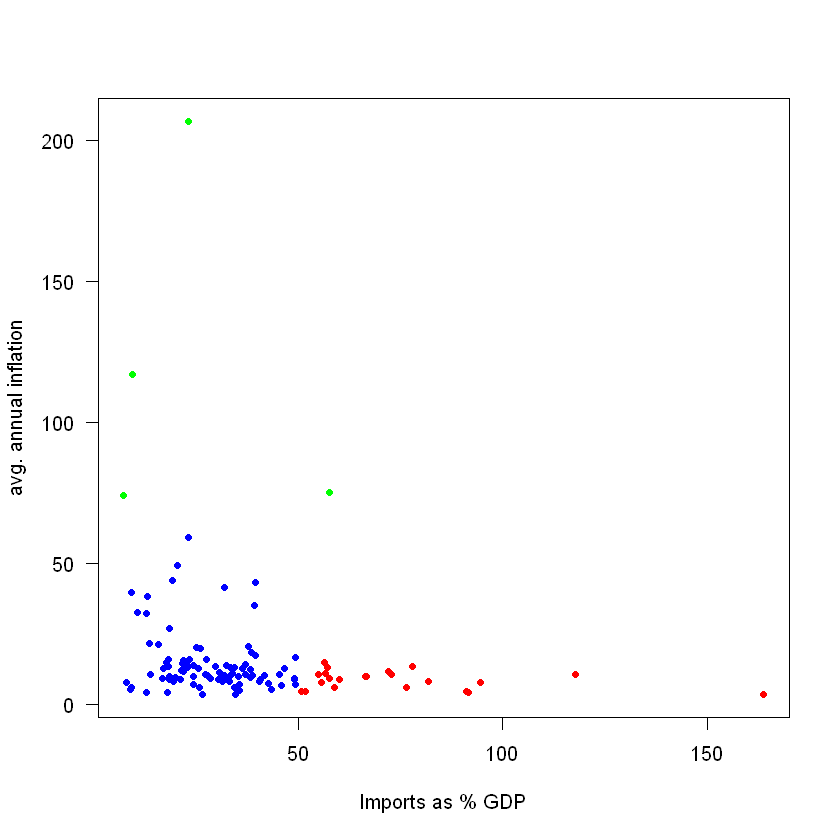

In [52]:
## installing the 'flexclust' package if not previously installed
if (!require(flexclust)) install.packages('flexclust')

#Perform k-means clustering
knum=3 #Set desired number of clusters
kres=kcca(mydatos,k=knum, family=kccaFamily("kmeans", dist="Euclidian", cent="mean"))

#sum(info(kres,which="av_dist"))

#plot solution
plot(x=datos$open, y=datos$inf,
     xlab="Imports as % GDP", ylab="avg. annual inflation",
     main="", type="n",las=1)
colors=rainbow(knum)[kres@cluster]
points(x=datos$open, y=datos$inf, cex=1.1, col=colors, pch=20)


ERROR: Error in .local(object, which, ...): Requested info not available, use 'which="help"' to list available infos.


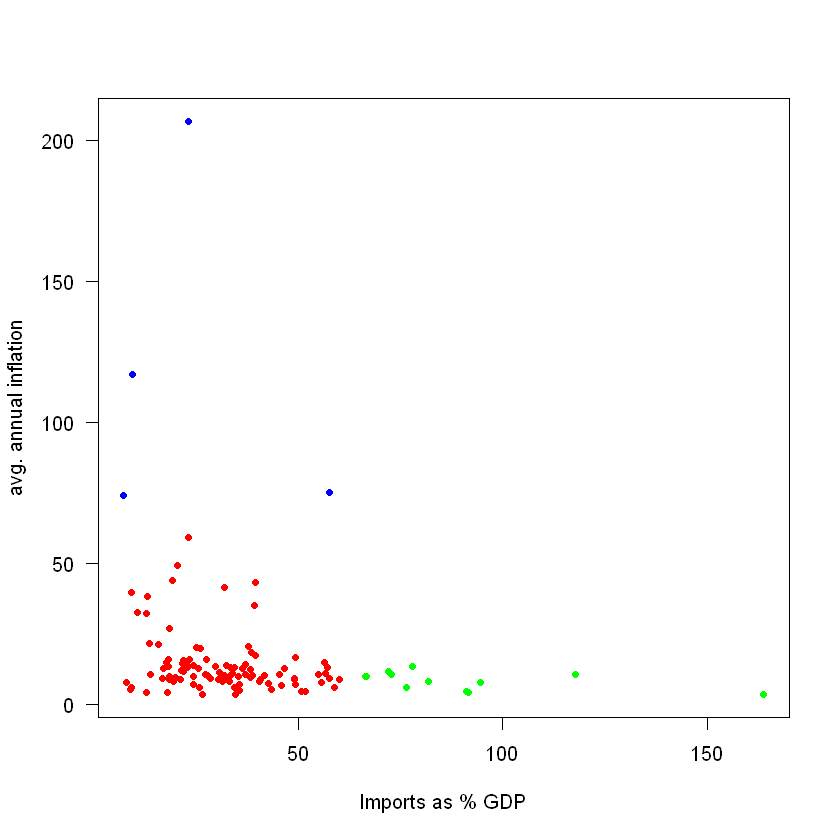

In [49]:
#Perform k-means clustering
knum=3 #Set desired number of clusters
kres=kcca(mydatos,k=knum, family=kccaFamily("kmeans", dist="distCor", cent="mean"))

#plot solution
plot(x=datos$open, y=datos$inf,
     xlab="Imports as % GDP", ylab="avg. annual inflation",
     main="", type="n",las=1)
colors=rainbow(knum)[kres@cluster]
points(x=datos$open, y=datos$inf, cex=1.1, col=colors, pch=20)

info(kres,"avg_dist")

2 : * * * * * * * * * * * * * * * * * * * * * * * * *
3 : * * * * * * * * * * * * * * * * * * * * * * * * *
4 : * * * * * * * * * * * * * * * * * * * * * * * * *
5 : * * * * * * * * * * * * * * * * * * * * * * * * *
6 : * * * * * * * * * * * * * * * * * * * * * * * * *
7 : * * * * * * * * * * * * * * * * * * * * * * * * *
8 : * * * * * * * * * * * * * * * * * * * * * * * * *
9 : * * * * * * * * * * * * * * * * * * * * * * * * *
10 : * * * * * * * * * * * * * * * * * * * * * * * * *
11 : * * * * * * * * * * * * * * * * * * * * * * * * *
12 : * * * * * * * * * * * * * * * * * * * * * * * * *
13 : * * * * * * * * * * * * * * * * * * * * * * * * *
14 : * * * * * * * * * * * * * * * * * * * * * * * * *
15 : * * * * * * * * * * * * * * * * * * * * * * * * *
2 : * * * * * * * * * * * * * * * * * * * * * * * * *
3 : * * * * * * * * * * * * * * * * * * * * * * * * *
4 : * * * * * * * * * * * * * * * * * * * * * * * * *
5 : * * * * * * * * * * * * * * * * * * * * * * * * *
6 : * * * * * * * * * 

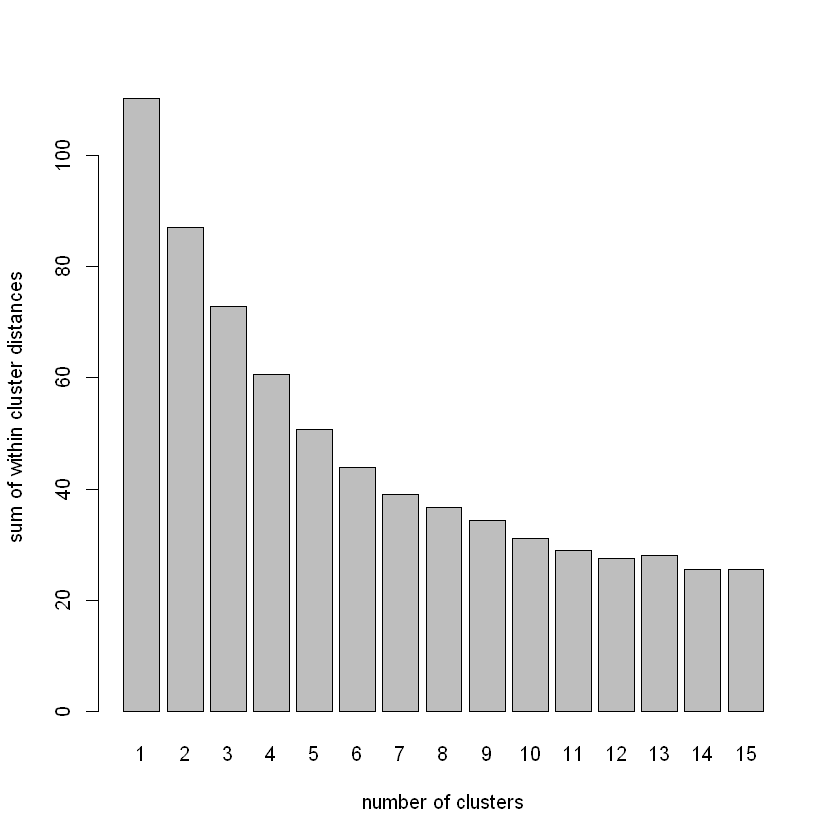

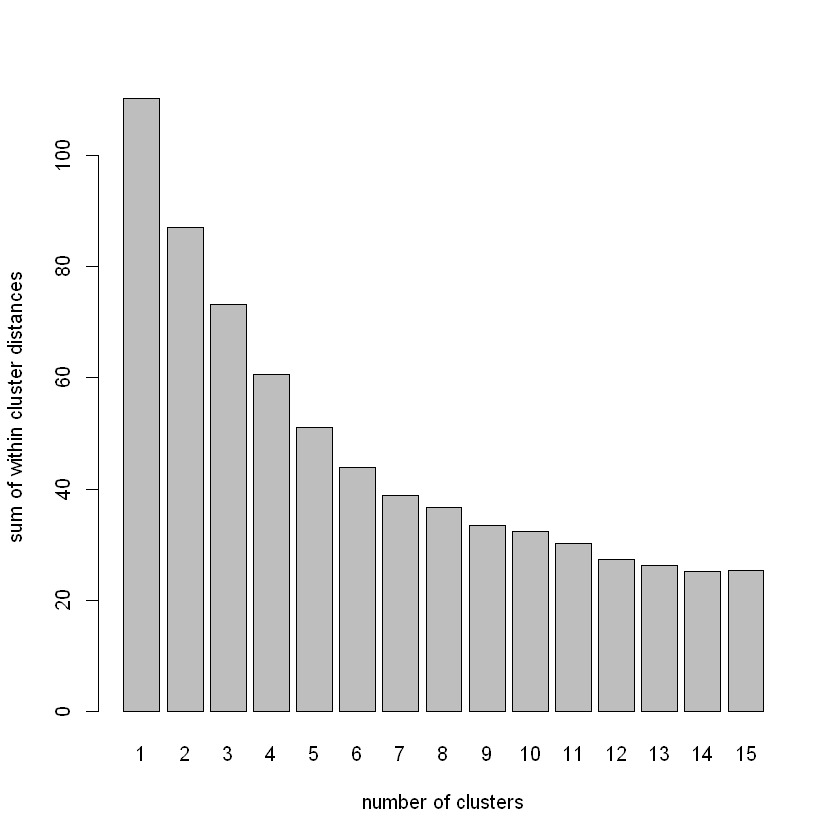

In [69]:
#Elbow Method for finding the optimal number of clusters
set.seed(123)
cl1 <- stepFlexclust(mydatos, k=2:15, FUN=kcca,
                     family=kccaFamily("kmeans", dist="Euclidian", cent="mean"),
                     nrep=25,multicore=FALSE)
plot(cl1)

cl2 <- stepFlexclust(mydatos, k=2:15, FUN=kcca,
                     family=kccaFamily("kmeans", dist="distCor", cent="mean"),
                     nrep=25,multicore=FALSE)
plot(cl2)
